In [1]:
## what is regularization

## regularization is the method of adding a penalty term to cost function of a linear regression 


### there are two terms of bias-varience trade-off?


In [2]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns


import warnings 
warnings.filterwarnings('ignore')


%matplotlib inline
plt.style.use('fivethirtyeight')


In [3]:
data = pd.read_csv('Boston.csv',index_col=0)
                  


data.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# datadescription

In [4]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
zn,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
indus,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
chas,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
nox,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
rm,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
age,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
dis,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
rad,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
tax,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [6]:
# looking at null values 

data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

# EDA

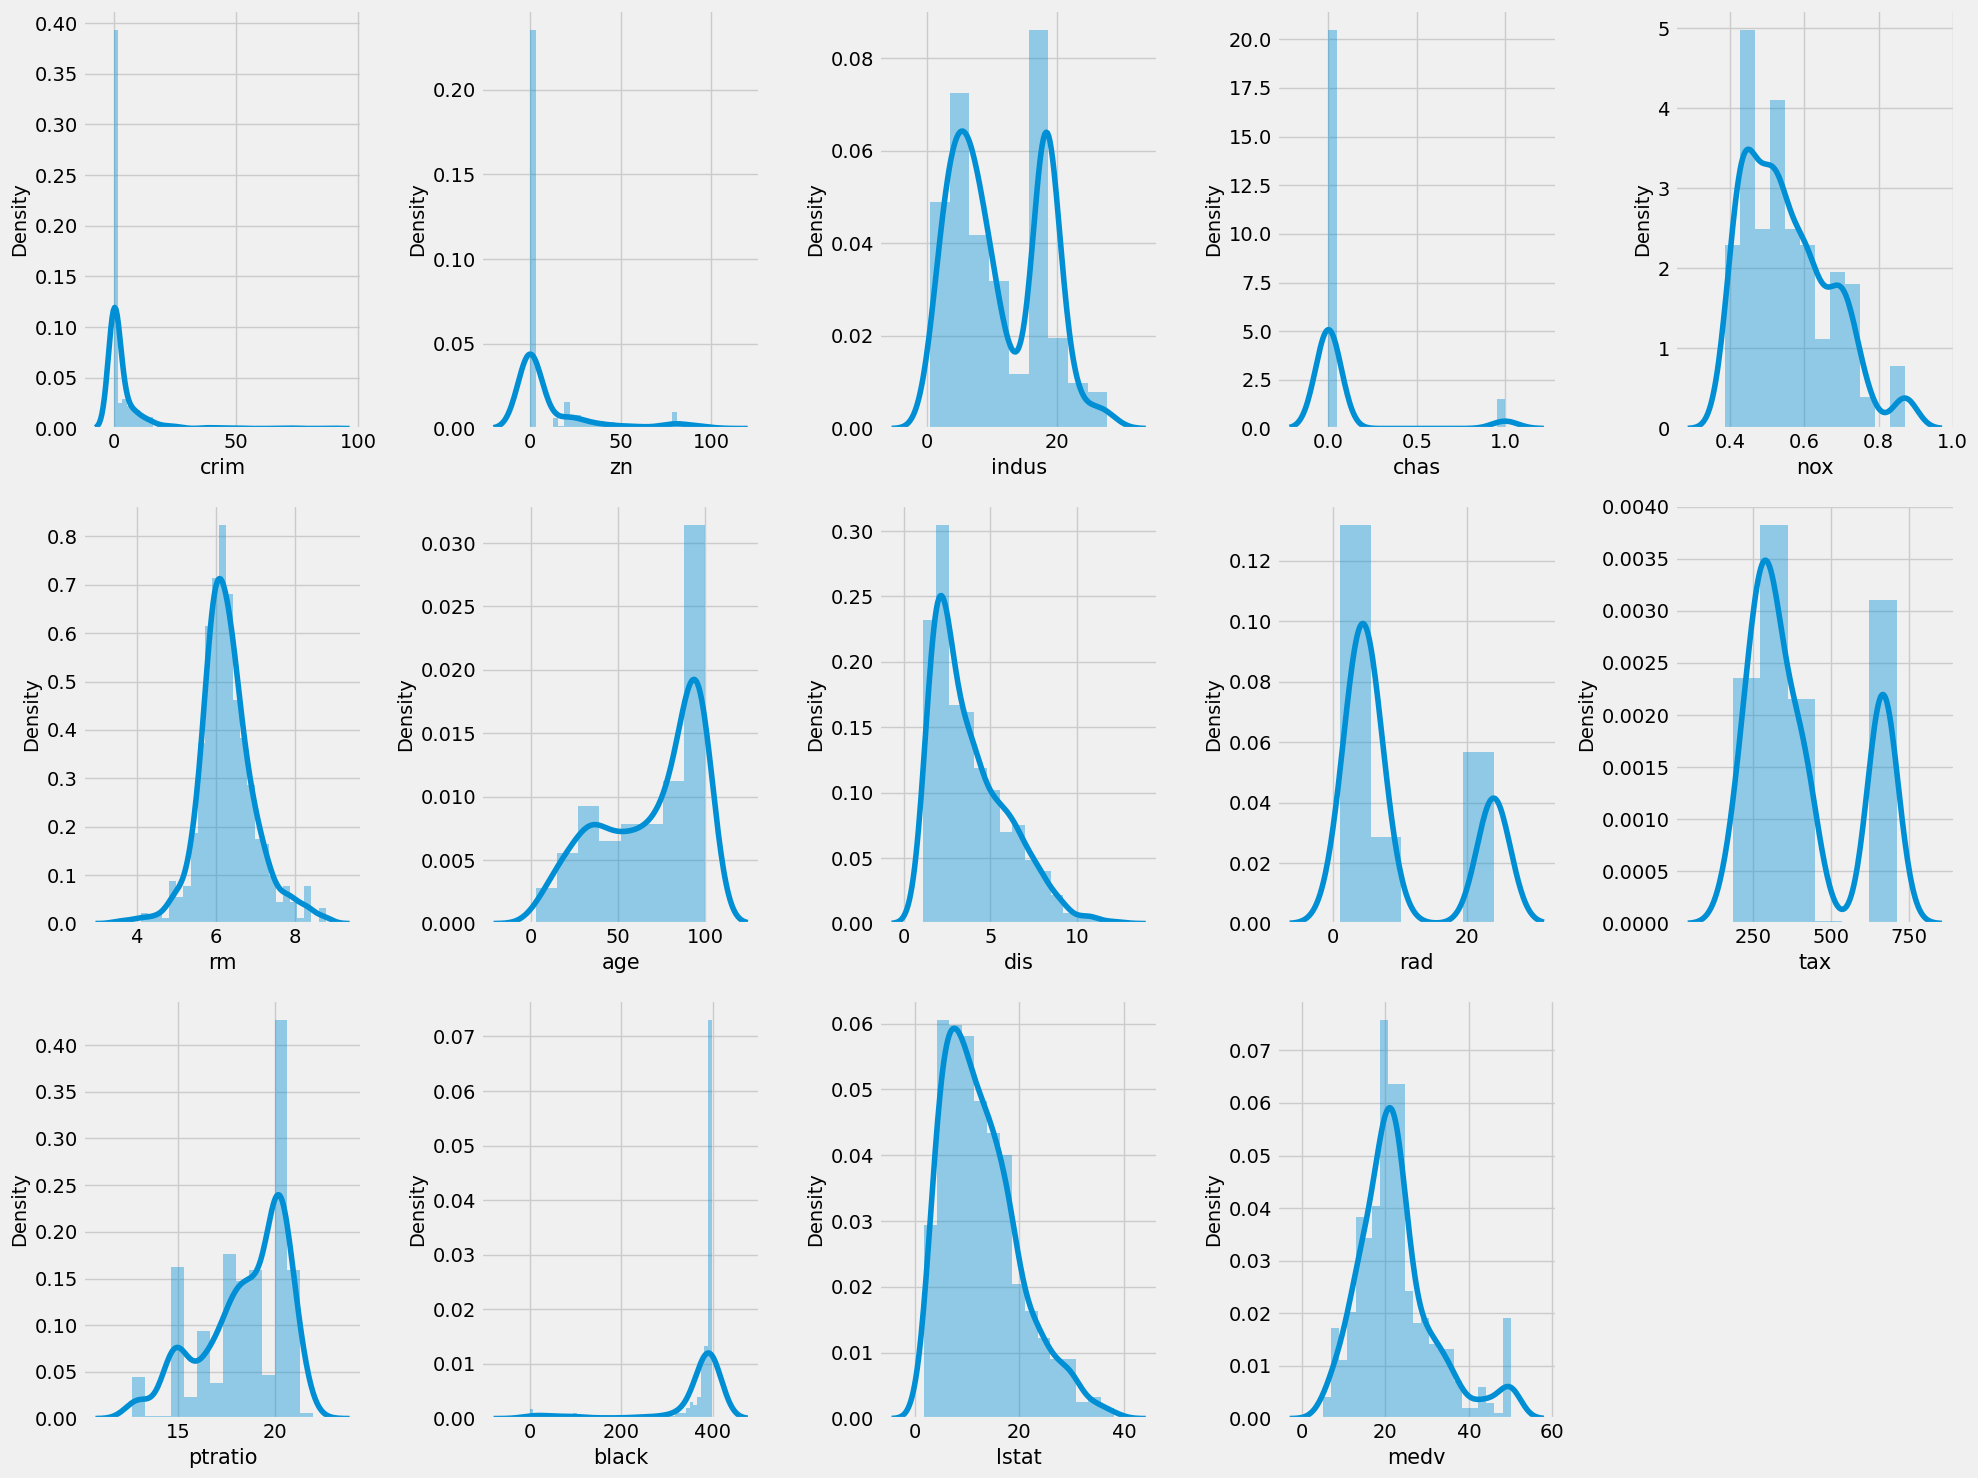

In [7]:
# Let's see how data is distributed for every column

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

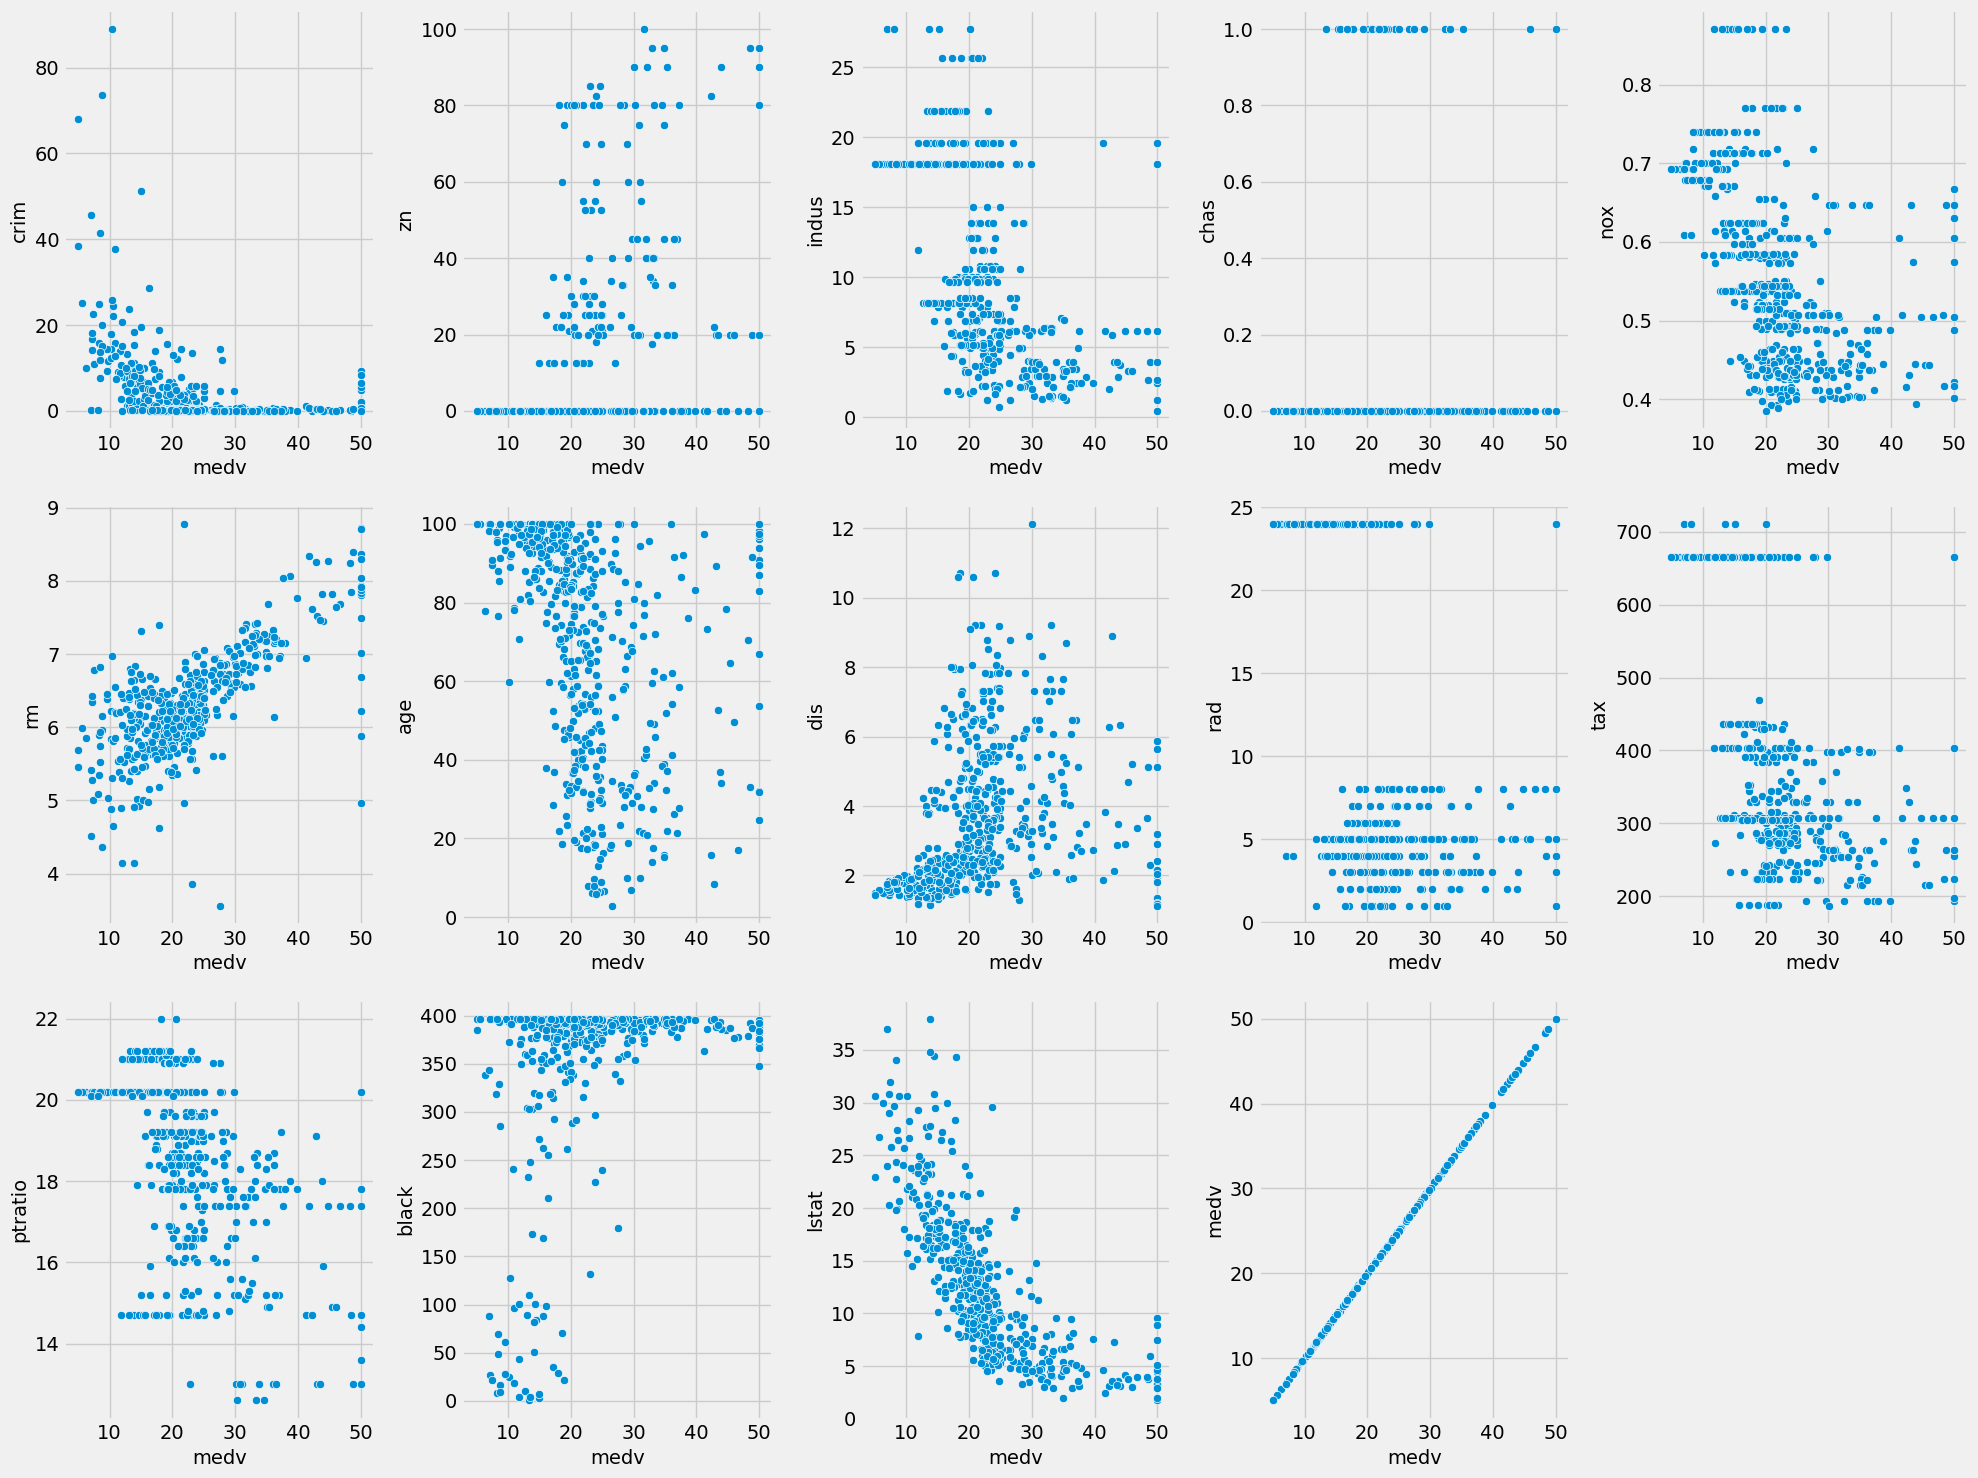

In [9]:
# Plotting `Price` with remaining columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = data['medv'], 
                        y = data[column])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

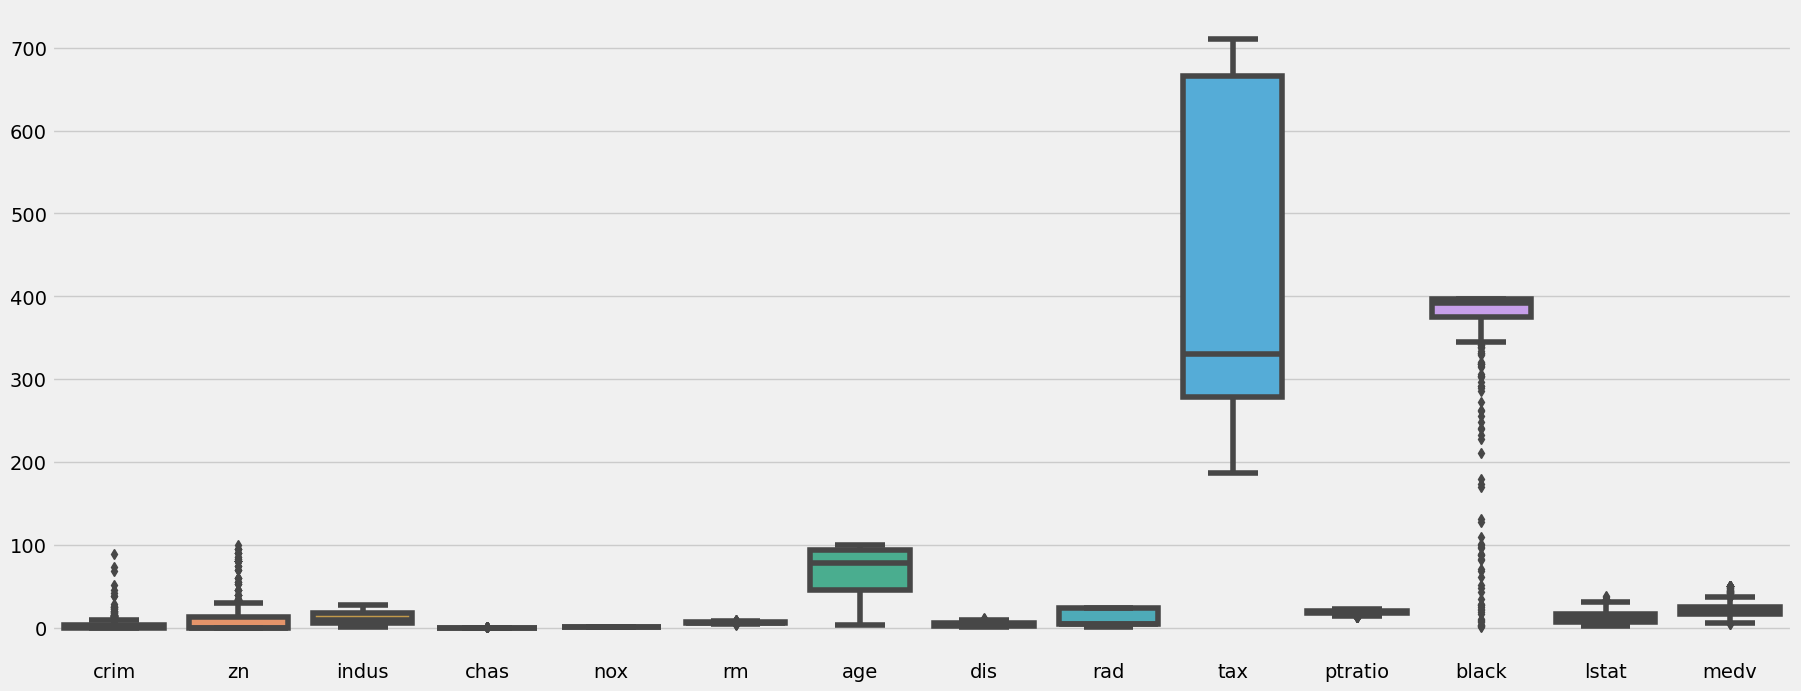

In [10]:
# looking for outliers using box plot

plt.figure(figsize = (20, 8))
sns.boxplot(data = data, width = 0.8)
plt.show()

In [11]:
# creating features and label variable

X = data.drop(columns=["medv"])
y = data['medv']

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [14]:
# checking for multicollinearity using `VIF` 
# and `correlation matrix`

from statsmodels.stats.outliers_influence \
import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF']=[variance_inflation_factor(X_scaled, i)\
              for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns

vif

,VIF,Features
0,1.792192,crim
1,2.298758,zn
2,3.991596,indus
3,1.073995,chas
4,4.393720,nox
5,1.933744,rm
6,3.100826,age
7,3.955945,dis
8,7.484496,rad
9,9.008554,tax


In [15]:
# dropping 'TAX' column from data

X.drop(columns = ['tax'])

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,black,lstat
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,21.0,391.99,9.67
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,21.0,396.90,9.08
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,21.0,396.90,5.64
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,21.0,393.45,6.48


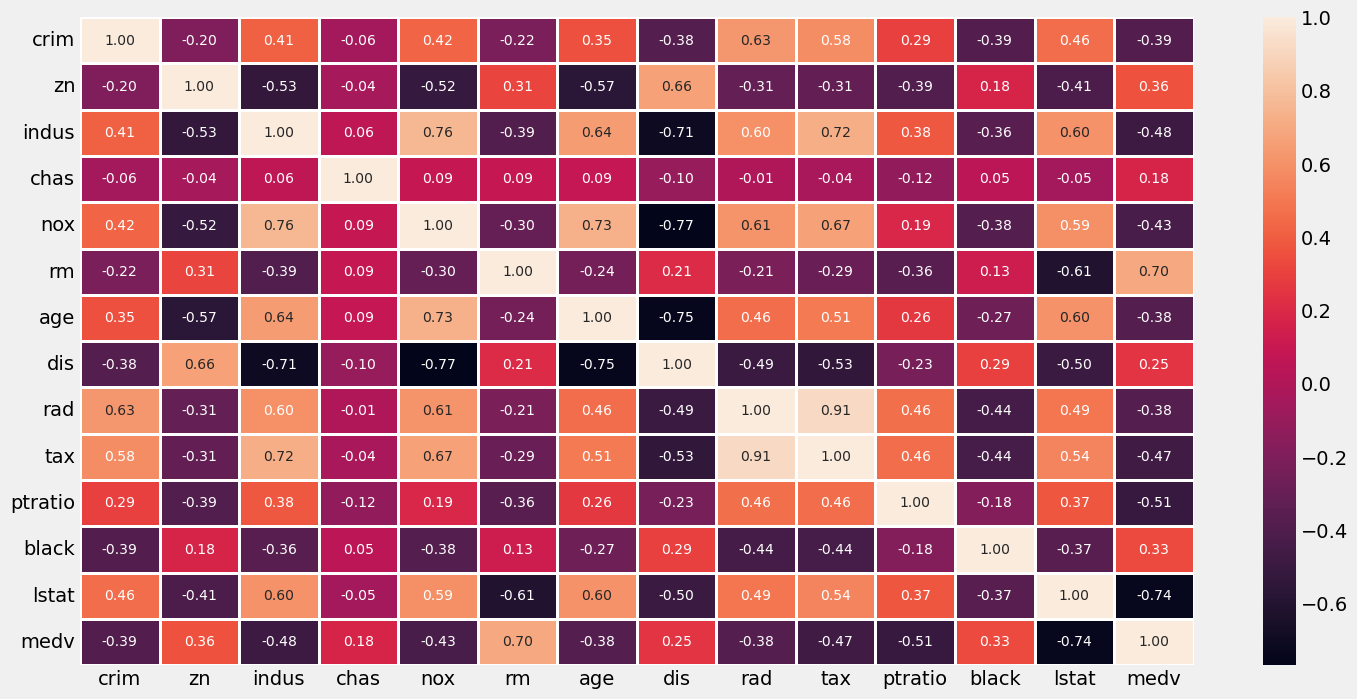

In [16]:
# Heatmap

fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(data.corr(), annot = True, 
            fmt = '1.2f', 
            annot_kws = {'size' : 10}, 
            linewidth = 1)
plt.show()

In [17]:
import statsmodels.formula.api as smf

lm = smf.ols(formula = 'medv ~ rad', data = data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     85.91
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           5.47e-19
Time:                        19:24:39   Log-Likelihood:                -1800.4
No. Observations:                 506   AIC:                             3605.
Df Residuals:                     504   BIC:                             3613.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.3821      0.562     46.964      0.000      25.278      27.486
rad           -0.4031      0.043     -9.269      0.000      -0.489      -0.318
==============================================================================
Omnibus:                      149.634   Durbin-Watson:                   0.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              359.231
Skew:                           1.515   Prob(JB):                     9.86e-79
Kurtosis:                       5.803   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:

import statsmodels.formula.api as smf

# Assuming df is your DataFrame
lm = smf.ols(formula='medv ~ tax', data=data).fit()

# Display the summary statistics of the linear regression model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           5.64e-29
Time:                        19:29:05   Log-Likelihood:                -1777.5
No. Observations:                 506   AIC:                             3559.
Df Residuals:                     504   BIC:                             3568.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.9707      0.948     34.768      0.0

In [31]:
lm = smf.ols(formula='medv ~ tax', 
             data = data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           5.64e-29
Time:                        19:37:14   Log-Likelihood:                -1777.5
No. Observations:                 506   AIC:                             3559.
Df Residuals:                     504   BIC:                             3568.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.9707      0.948     34.768      0.000      31.108      34.834
tax           -0.0256      0.002    -11.906      0.000      -0.030      -0.021
==============================================================================
Omnibus:                      172.501   Durbin-Watson:                   0.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.072
Skew:                           1.661   Prob(JB):                    5.17e-108
Kurtosis:                       6.521   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# removing "RAD" column

data.drop(columns = 'rad',inplace = True)

KeyError: "['rad'] not found in axis"

In [33]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2


In [37]:

# splitting data into training asnd test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(X_scaled, y, 
                 test_size = 0.30, 
                 random_state = 0)

In [38]:
# fitting training data to model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
# prediction of model

y_pred = lr.predict(X_test)

In [40]:
# training accuracy of model

lr.score(X_train, y_train)

0.7645451026942549

In [41]:
# test accuracy of model

lr.score(X_test, y_test)

0.6733825506400196

In [42]:
# creating a function to create adhusted R-Squared

def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return adjusted_r2

In [43]:
print(adj_r2(X_train, y_train, lr))

0.7555424154443293


In [44]:
print(adj_r2(X_test, y_test, lr))

0.642614240193065


# lasso Regression

In [45]:
from sklearn.linear_model import Lasso, LassoCV

lasso_cv = LassoCV(alphas = None, cv = 10, 
        max_iter = 100000)
lasso_cv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000)

In [46]:
# best alpha parameter

alpha = lasso_cv.alpha_
alpha

0.01030565462491855

In [48]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01030565462491855)

In [49]:
lasso.score(X_train, y_train)

0.7644689900043997

In [50]:
lasso.score(X_test, y_test)

0.6723928734140832

In [51]:
print(adj_r2(X_train, y_train, lasso))

0.7554633925633915


In [52]:
print(adj_r2(X_test, y_test, lasso))

0.6415313325038157


# Ridge Regression

In [53]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, 
            cv = 10)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([4.21755959e+00, 4.16116216e-01, 7.23371944e+00, 3.02561577e+00,
       4.32889977e+00, 7.95516495e+00, 1.91441716e+00, 1.49709689e+00,
       1.20368395e+00, 3.52133118e+00, 6.57952016e+00, 6.19793605e+00,
       6.07215581e+00, 4.16108710e+00, 1.52888285e+00, 7.28876383e+00,
       7.39813540e+00, 1.95670637e-03, 1.47227993e+00, 3.28511485e+00,
       4.82264618e-01, 9.30312998e+0...
       6.93210839e+00, 1.42390938e+00, 4.61910277e+00, 1.63374176e+00,
       5.42927040e+00, 7.02641811e+00, 5.87005182e+00, 3.96764781e+00,
       2.02457240e+00, 6.34731840e+00, 4.56287909e+00, 5.33915523e+00,
       5.28490072e+00, 7.66801713e-01, 6.39333649e+00, 8.38956236e+00,
       7.48518605e-01, 6.08965064e+00, 8.91803376e+00, 8.48045602e-01,
       7.06790043e+00, 5.58647073e+00, 7.11573117e+00, 7.44712884e+00,
       6.47960845e+00, 3.90399950e-01]),
        cv=10)

In [54]:
# best alpha parameter

alpha = ridge_cv.alpha_
alpha

9.303129983603931

In [55]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=9.303129983603931)

In [56]:
ridge.score(X_train, y_train)

0.7634335449598364

In [57]:
ridge.score(X_test, y_test)

0.6677414609544944

In [58]:
print(adj_r2(X_train, y_train, ridge))

0.7543883569730067


In [59]:
print(adj_r2(X_test, y_test, ridge))

0.6364417435081786


# Elastic Net

In [60]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

elastic_net_cv = ElasticNetCV(alphas = None, 
                              cv = 10, 
                              max_iter = 100000)
elastic_net_cv.fit(X_train, y_train)

ElasticNetCV(cv=10, max_iter=100000)

In [61]:
# best alpha parameter

alpha = elastic_net_cv.alpha_
alpha

0.015591699580389263

In [62]:
# l1 ratio 

elastic_net_cv.l1_ratio

0.5

In [63]:
elastic_net = ElasticNet(alpha = elastic_net_cv.alpha_, l1_ratio = elastic_net_cv.l1_ratio)
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.015591699580389263)

In [64]:
elastic_net.score(X_train, y_train)

0.7642714287976234

In [65]:
elastic_net.score(X_test, y_test)

0.6709719899541056

In [66]:
print(adj_r2(X_train, y_train, elastic_net))

0.7552582775457679


In [67]:
print(adj_r2(X_test, y_test, elastic_net))

0.6399765977034053
